# ДЗ к уроку №3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [4]:
X_st = X.copy().astype(np.float64)

for i in range(X_st.shape[0]):
    if i != 0:
        X_st[i] =  calc_std_fit(X_st[i])
        
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

## 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [5]:
def calc_logloss(y, y_pred):
    y_pred = np.where(y_pred == 0, 1e-18, y_pred)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

## 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [6]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [7]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            #print(i, W, err)
            pass
    return W, err

In [8]:
iterations = np.linspace(1e3, 1e4, 5)
alphas = np.logspace(-2, -8, 7)

min_err = np.inf
weights = 0

for it in iterations:
    for al in alphas:
        non, err = eval_model(X_st, y, iterations=int(it), alpha=al)
        print(f'Iterations: {it} и alpha: {al} дают logloss = {err}')
        if err < min_err:
            min_err = err
            weights = (it, al)

print(f'\nМинимальное значение LogLoss {min_err} достигается при значениях iteration={weights[0]}, alpha={weights[1]}')

Iterations: 1000.0 и alpha: 0.01 дают logloss = 0.46129017053513033
Iterations: 1000.0 и alpha: 0.001 дают logloss = 0.6512037362503481
Iterations: 1000.0 и alpha: 0.0001 дают logloss = 0.7507528681143767
Iterations: 1000.0 и alpha: 1e-05 дают logloss = 0.7625205365285943
Iterations: 1000.0 и alpha: 1e-06 дают logloss = 0.7637156161300749
Iterations: 1000.0 и alpha: 1e-07 дают logloss = 0.7638353073533598
Iterations: 1000.0 и alpha: 1e-08 дают logloss = 0.7638472783084501
Iterations: 3250.0 и alpha: 0.01 дают logloss = 0.3810987655960094
Iterations: 3250.0 и alpha: 0.001 дают logloss = 0.52907982447217
Iterations: 3250.0 и alpha: 0.0001 дают logloss = 0.722760189943928
Iterations: 3250.0 и alpha: 1e-05 дают logloss = 0.7595444536943682
Iterations: 3250.0 и alpha: 1e-06 дают logloss = 0.7634162346544062
Iterations: 3250.0 и alpha: 1e-07 дают logloss = 0.7638053514694343
Iterations: 3250.0 и alpha: 1e-08 дают logloss = 0.76384428254269
Iterations: 5500.0 и alpha: 0.01 дают logloss = 0.34

## 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [9]:
def calc_pred_proba(W, X):
    y_pred = np.dot(W, X)
    y_pred_proba = sigmoid(y_pred)
    return y_pred_proba

In [10]:
W = eval_model(X_st, y, iterations=int(weights[0]), alpha=weights[1])[0]
calc_pred_proba(W, X_st)

array([0.26667338, 0.18262692, 0.96351979, 0.2218171 , 0.64352988,
       0.3178045 , 0.98768905, 0.15130644, 0.29115199, 0.93492759])

## 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [11]:
def calc_pred(W, X):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = [1 if x>0.5 else 0 for x in y_pred_proba] 
    return y_pred

In [12]:
y_pred = calc_pred(W, X_st)
y_pred

[0, 0, 1, 0, 1, 0, 1, 0, 0, 1]

## 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [13]:
import pandas as pd
import seaborn as sns  
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

In [14]:
pd.DataFrame(confusion_matrix(y, y_pred))

,0,1
0,5,0
1,1,4


In [15]:
TP, TN, FP, FN = 0, 0, 0, 0 
    
for i in range(len(y)):
    if (calc_pred(W, X_st)[i] == 1) & (y[i] == 1):
        TP += 1
    if (calc_pred(W, X_st)[i] == 1) & (y[i] == 0):
        FP += 1
    if (calc_pred(W, X_st)[i] == 0) & (y[i] == 0):
        TN += 1
    if (calc_pred(W, X_st)[i] == 0) & (y[i] == 1):
        FN += 1 
print(TP, TN, FP, FN)

4 5 0 1


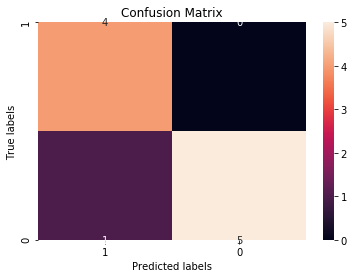

In [25]:
#cm = confusion_matrix(y, y_pred)
cm = [[TP, FP],[FN, TN]]

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

In [17]:
def metrics(X, y):
    TP, TN, FP, FN = 0, 0, 0, 0 
    
    for i in range(len(y)):
        if (calc_pred(W, X)[i] == 1) & (y[i] == 1):
            TP += 1
        if (calc_pred(W, X)[i] == 1) & (y[i] == 0):
            FP += 1
        if (calc_pred(W, X)[i] == 0) & (y[i] == 0):
            TN += 1
        if (calc_pred(W, X)[i] == 0) & (y[i] == 1):
            FN += 1 
    print(TP, TN, FP, FN)
    
    accuracy = (TP + TN) / (TP + FP + FN + TN)

    precision = TP / (TP + FP)

    recall = TP / (TP + FN)

    f1_score = (2 * precision * recall) / (precision + recall)
    
    print(f'accuracy = {accuracy}')
    print(f'precision = {precision}')
    print(f'recall = {recall}')
    print(f'F1-score = {f1_score}')

In [18]:
metrics(X_st, y)

4 5 0 1
accuracy = 0.9
precision = 1.0
recall = 0.8
F1-score = 0.888888888888889


## 6. Могла ли модель переобучиться? Почему?

Т.к. accuracy, recall и f1 не имеют максимальных значений, то вряд ли модель переобучилась.

## 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [19]:
def eval_model_L1(X, y, iterations, alpha=1e-4, lambda_=1e-2):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        if i % (iterations / 10) == 0:
            #print(i, W, err)
            pass
    return W

In [20]:
def eval_model_L2(X, y, iterations, alpha=1e-4, lambda_=1e-2):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * W**2)
        if i % (iterations / 10) == 0:
            #print(i, W, err)
            pass
    return W

In [21]:
W1 = eval_model_L1(X_st, y, 10000, alpha=0.01)
W1

array([ 0.50269558, -3.02957214, -1.50376656,  5.29189185])

In [22]:
W2 = eval_model_L2(X_st, y, 10000, alpha=0.01)
W2

array([-0.73826737, -9.23683576,  1.72097213,  3.85030836])